# Import data

In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_json('recipies.json')
df.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [74]:
df['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [75]:
df['cuisine'].unique().shape[0]

20

In [76]:
cuisine_list = df['cuisine'].unique()

In [77]:
import itertools
from collections import Counter
greek_list = df[df['cuisine'] == 'greek']['ingredients'].tolist()
greek_list = list(itertools.chain(*greek_list))
Counter(greek_list).most_common()

[('salt', 572),
 ('olive oil', 504),
 ('dried oregano', 267),
 ('garlic cloves', 254),
 ('feta cheese crumbles', 252),
 ('extra-virgin olive oil', 229),
 ('fresh lemon juice', 222),
 ('ground black pepper', 221),
 ('garlic', 216),
 ('pepper', 203),
 ('feta cheese', 191),
 ('cucumber', 187),
 ('purple onion', 186),
 ('onions', 185),
 ('lemon juice', 183),
 ('tomatoes', 156),
 ('water', 143),
 ('lemon', 129),
 ('fresh parsley', 113),
 ('fresh dill', 108),
 ('all-purpose flour', 100),
 ('red wine vinegar', 99),
 ('butter', 90),
 ('black pepper', 89),
 ('kosher salt', 85),
 ('greek yogurt', 84),
 ('fresh oregano', 83),
 ('eggs', 80),
 ('kalamata', 78),
 ('sugar', 77),
 ('ground cinnamon', 73),
 ('large eggs', 72),
 ('pitted kalamata olives', 70),
 ('minced garlic', 68),
 ('chopped fresh mint', 68),
 ('ground lamb', 68),
 ('honey', 67),
 ('cooking spray', 67),
 ('flat leaf parsley', 65),
 ('eggplant', 61),
 ('unsalted butter', 59),
 ('diced tomatoes', 57),
 ('plain yogurt', 56),
 ('green on

In [78]:
italian_list = df[df['cuisine'] == 'italian']['ingredients'].tolist()
italian_list = list(itertools.chain(*italian_list))
Counter(italian_list).most_common()

[('salt', 3454),
 ('olive oil', 3111),
 ('garlic cloves', 1619),
 ('grated parmesan cheese', 1580),
 ('garlic', 1471),
 ('ground black pepper', 1444),
 ('extra-virgin olive oil', 1362),
 ('onions', 1240),
 ('water', 1052),
 ('butter', 1030),
 ('pepper', 965),
 ('all-purpose flour', 918),
 ('fresh basil', 787),
 ('sugar', 760),
 ('dry white wine', 658),
 ('kosher salt', 656),
 ('black pepper', 636),
 ('fresh parsley', 631),
 ('eggs', 627),
 ('dried oregano', 626),
 ('large eggs', 625),
 ('tomatoes', 601),
 ('flat leaf parsley', 588),
 ('unsalted butter', 564),
 ('cooking spray', 491),
 ('parmesan cheese', 474),
 ('fresh lemon juice', 471),
 ('diced tomatoes', 429),
 ('dried basil', 425),
 ('crushed red pepper', 418),
 ('shredded mozzarella cheese', 413),
 ('mozzarella cheese', 396),
 ('carrots', 379),
 ('tomato paste', 376),
 ('tomato sauce', 357),
 ('red bell pepper', 354),
 ('fresh basil leaves', 352),
 ('purple onion', 350),
 ('balsamic vinegar', 348),
 ('italian seasoning', 347),
 (

In [79]:
features_all_list = []
for i in df.ingredients:
    features_all_list.extend(i)
features = list(set(features_all_list))
len(features)

6714

There are 20 cuisins and 6714 ingredients

# Classification of cuisine based on ingredients
## one hot encoding the ingredients for each recipe

In [80]:
onehot_ingredients = np.zeros((df.shape[0], len(features)))

feature_lookup = sorted(features)

for index, row in df.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients[index, feature_lookup.index(ingredient)] = 1

In [81]:
y = df.cuisine.values.reshape(-1,1)

In [82]:
df_features = pd.DataFrame(onehot_ingredients)

d = {}

for i in range(len(features)):
    d[df_features.columns[i]] = features[i]

df_features = df_features.rename(columns=d)
df_features

,cho-cho,Cavenders Greek Seasoning,rice vermicelli,roast turkey,custard dessert mix,angel food cake,Accent Seasoning,roasted red peppers,cream cheese frosting,rock shrimp,...,sour cherries,New York Style Panetini® toasts,pears,arctic char,nopalitos,pork roast,kampyo,rosemary sprigs,tea leaves,"dri basil leaves, crush"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split data into training and testing

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

## Random forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)
# Train the model on training data
rf.fit(X_train, y_train.ravel())

In [83]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_pred)
a

0.7228158390949089

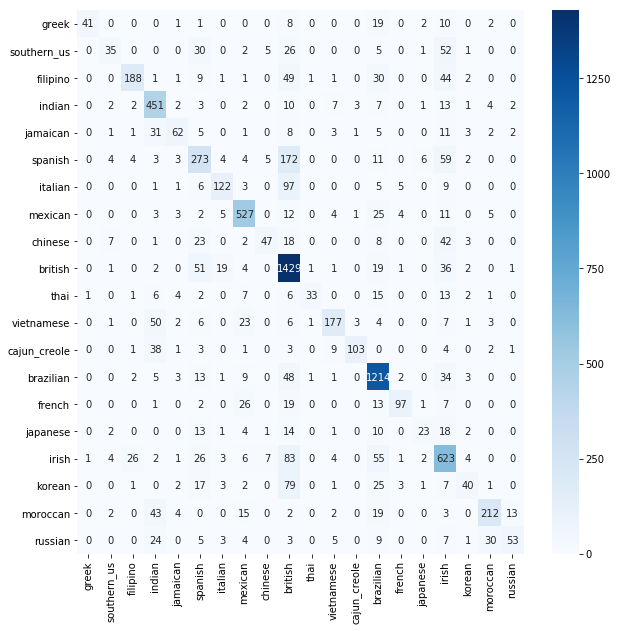

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
bars = df['cuisine'].unique().tolist()
fig, ax = plt.subplots(figsize=(10,10))
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
ax = sn.heatmap(cm_df, annot=True, fmt='g', cmap="Blues");
ax.set_xticklabels(bars,size = 10, rotation = 90);
ax.set_yticklabels(bars,size = 10, rotation = 360);
#plt.xlabel('Predicted')
#plt.ylabel('True')

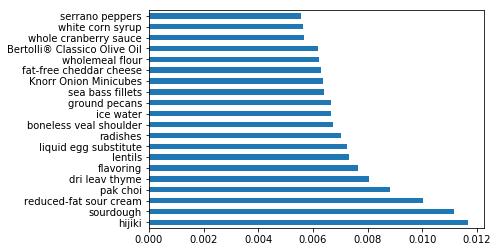

In [85]:
feat_importances = pd.Series(rf.feature_importances_, index=features)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
estimator = rf.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df_features.columns,
                class_names = df.cuisine.values,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Use wordnet to group similar features together (did not improve the accuracy)

In [ ]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')

In [86]:
sorted(features)

['(    oz.) tomato sauce',
 '(   oz.) tomato paste',
 '(10 oz.) frozen chopped spinach',
 '(10 oz.) frozen chopped spinach, thawed and squeezed dry',
 '(14 oz.) sweetened condensed milk',
 '(14.5 oz.) diced tomatoes',
 '(15 oz.) refried beans',
 '1% low-fat buttermilk',
 '1% low-fat chocolate milk',
 '1% low-fat cottage cheese',
 '1% low-fat milk',
 '2 1/2 to 3 lb. chicken, cut into serving pieces',
 '2% low fat cheddar chees',
 '2% low-fat cottage cheese',
 '2% lowfat greek yogurt',
 '2% milk shredded mozzarella cheese',
 '2% reduced-fat milk',
 '25% less sodium chicken broth',
 '33% less sodium cooked deli ham',
 '33% less sodium cooked ham',
 '33% less sodium ham',
 '33% less sodium smoked fully cooked ham',
 '40% less sodium taco seasoning',
 '40% less sodium taco seasoning mix',
 '7 Up',
 '8 ounc ziti pasta, cook and drain',
 '95% lean ground beef',
 'A Taste of Thai Rice Noodles',
 'Accent Seasoning',
 'Adobo All Purpose Seasoning',
 'Alaskan king crab legs',
 'Alexia Waffle Frie

In [88]:
from nltk.corpus import wordnet as wn
food = wn.synset('food.n.02')
food_list = set(
    [w for s in food.closure(lambda s: s.hyponyms()) for w in s.lemma_names()])
print(len(food_list))

1621


In [89]:
food_list = list(map(str.lower, food_list))

In [90]:
new_features = []
for i in features:
    i = i.replace(' ', '_')
    new_ingred = []
    for j in food_list:
        if i.find(j) != -1:
            new_ingred.append(j)
    if len(new_ingred) > 0:
        new_features.append(' '.join(sorted(new_ingred)))
    else:
        new_features.append(i)
        

In [91]:
new_features

['cho-cho',
 'Cavenders_Greek_Seasoning',
 'vermicelli',
 'roast turkey',
 'custard_dessert_mix',
 'angel_food_cake cake',
 'Accent_Seasoning',
 'pepper red_pepper roast',
 'cheese cream_cheese',
 'shrimp',
 'gravy',
 'branzino',
 'minute_rice',
 'pasta',
 'fillet haddock',
 'macarons',
 'low_sodium_stock',
 'lemon',
 'crushed_ice',
 'cheese',
 'sparkling_sugar',
 'cod fillet',
 'fish monkfish',
 'juice_concentrate',
 'beef meat roast roast_beef',
 'cake cake_mix white_cake',
 'bread sweetbread sweetbreads',
 'potato',
 'bread pea',
 'fine_grind_white_cornmeal',
 'cheese',
 'Greek_dressing',
 'bean kidney_bean',
 'au_jus_gravy_mix',
 'cake cake_mix',
 'almond_extract',
 'truffle',
 'brown_ale',
 'rice_mix',
 'yogurt',
 'chicken',
 'bean white_bean',
 'chine',
 'salmon',
 'veg veggie',
 'bass striped_bass tripe',
 'amaretto_liqueur',
 'winter_savory',
 'basmati',
 'salmon smoked_salmon',
 'cracker graham_cracker ham rack',
 'Texas_Pete_Hot_Sauce',
 'sweet_and_sour_sauce',
 'ranch_salad_

In [92]:
len(list(set(new_features)))

3990

## one hot encoding the simplified ingredients

In [93]:
feature_name_dic = dict()
for i in range(len(features)):
    feature_name_dic[features[i]] = new_features[i]

In [94]:
new_features = list(set(new_features))
onehot_ingredients_newfeatures = np.zeros((df.shape[0], len(new_features)))

feature_lookup = sorted(new_features)
for index, row in df.iterrows():
    for ingredient in row['ingredients']:
        onehot_ingredients_newfeatures[
            index, feature_lookup.index(feature_name_dic[ingredient])] = 1

y_new_features = df.cuisine.values.reshape(-1, 1)

In [95]:
onehot_ingredients_newfeatures.shape

(39774, 3990)

In [96]:
# Create a dataframe
df_new_features = pd.DataFrame(onehot_ingredients_newfeatures)

# Create empty dictionary to store featureindex:columnname
d = {}

# For each feature, fetch the column name
for i in range(len(new_features)):
    d[df_new_features.columns[i]] = new_features[i]

# Rename the features (stop using the index # and use the actual text)
df_new_features = df_new_features.rename(columns=d)
df_new_features

,meat pork,spaghetti spaghettini,cho-cho,hazelnut_flour,thyme_sprigs,Eggland's_Best®_eggs,Quorn_Chik''n_Tenders,hot_spanish_paprika,rennet,amaretto_liqueur,...,eater yam,kampyo,quatre_épices,lobster lobster_tail,curly_endive endive,syrup,extra_firm_tofu,mustard radish,loosely_packed_fresh_basil_leaves,malt_vinegar
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train, test
X_train_newfeatures, X_test_newfeatures, y_train_newfeatures, y_test_newfeatures = train_test_split(
    df_new_features, y_new_features, test_size=0.2, shuffle=True, random_state=42)

In [99]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf_newfeatures = RandomForestClassifier(n_estimators=200, random_state=42)
# Train the model on training data
rf_newfeatures.fit(X_train_newfeatures, y_train_newfeatures.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [100]:
# Use the forest's predict method on the test data
y_pred_newfeatures = rf_newfeatures.predict(X_test_newfeatures)


from sklearn.metrics import accuracy_score
a_newfeatures = accuracy_score(y_test_newfeatures, y_pred_newfeatures)
a_newfeatures

0.725958516656191

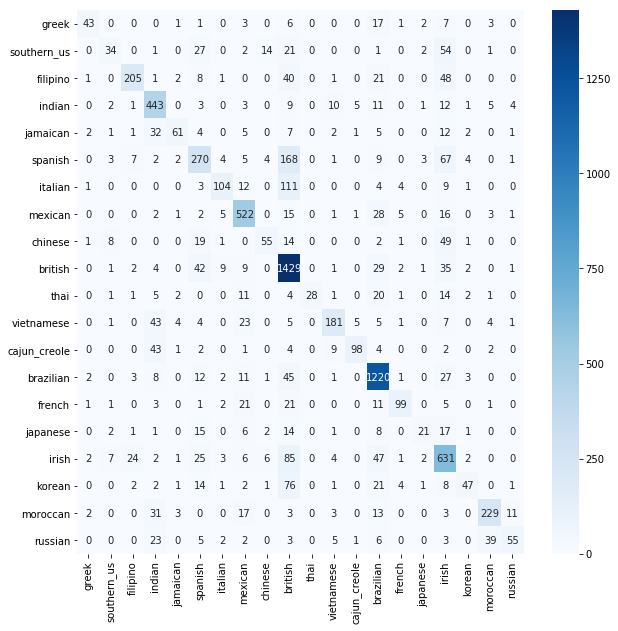

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
#bars = df_new_features['cuisine'].unique().tolist()
fig, ax = plt.subplots(figsize=(10,10))
cm_df = pd.DataFrame(confusion_matrix(y_test_newfeatures, y_pred_newfeatures))
ax = sn.heatmap(cm_df, annot=True, fmt='g', cmap="Blues");
ax.set_xticklabels(bars,size = 10, rotation = 90);
ax.set_yticklabels(bars,size = 10, rotation = 360);
#plt.xlabel('Predicted')
#plt.ylabel('True')

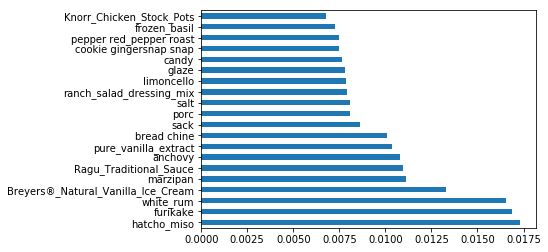

In [102]:
feat_importances = pd.Series(rf_newfeatures.feature_importances_, index=new_features)
feat_importances.nlargest(20).plot(kind='barh')

# Check which ingredients differentiate the cuisine
## Count the frequency the ingredients for cuisine

In [103]:
cuisine_ingredients_dic = {}
for i in range(df.shape[0]):
    if df['cuisine'][i] not in cuisine_ingredients_dic:
        cuisine_ingredients_dic[df['cuisine'][i]] = df['ingredients'][i]
    if df['cuisine'][i] in cuisine_ingredients_dic:
        cur_ingredients_list = cuisine_ingredients_dic[df['cuisine'][i]]
        cur_ingredients_list.extend(df['ingredients'][i])
        cuisine_ingredients_dic[df['cuisine'][i]] = cur_ingredients_list
    

In [104]:
cuisine_count_mat = np.zeros((df['cuisine'].unique().shape[0], len(features)))
i = 0
for cuisine in df['cuisine'].unique().tolist():
    each_cuisine_ingredients = cuisine_ingredients_dic[cuisine]
    for ing in each_cuisine_ingredients:
        j = features.index(ing)
        cuisine_count_mat[i, j] += 1
    i += 1

## TF-IDF

In [105]:
import pandas as pd
from scipy import sparse
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer
get_ipython().magic(u'matplotlib inline')


def tf_idf_from_count_matrix(countsMatrix):
    
    countsMatrix = sparse.csr_matrix(countsMatrix)
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(countsMatrix)
    tfidf.toarray() 
    return tfidf.toarray()


tfIdf_Matrix = tf_idf_from_count_matrix(cuisine_count_mat)
tfIdf_Matrix.shape

(20, 6714)

## PCA to reduce dimension

In [106]:

pca = PCA(n_components=2)
  
reduced_data = pca.fit_transform(tfIdf_Matrix)


pca2dataFrame = pd.DataFrame(reduced_data)
pca2dataFrame.columns = ['PC1', 'PC2']

In [107]:
print(pca.explained_variance_ratio_)  

[0.25237149 0.1385678 ]


In [108]:
pca2dataFrame = pd.concat(
    [pd.DataFrame(df['cuisine'].unique(), columns=['cuisine']), pca2dataFrame],
    axis=1)

## Visualization of PCA

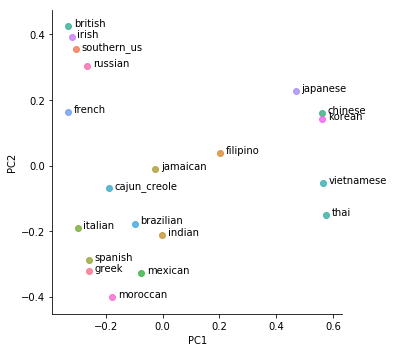

In [109]:
import seaborn
import matplotlib.pyplot as plt
seaborn.lmplot(x='PC1',
               y='PC2',
               data=pca2dataFrame,
               fit_reg=False,
               hue='cuisine',
               legend=False)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + .02, point['y'], str(point['val']))


label_point(pca2dataFrame.PC1, pca2dataFrame.PC2, pca2dataFrame.cuisine,
            plt.gca())

## K-means clustering the cuisine
### Elblow method to determine how many clusters

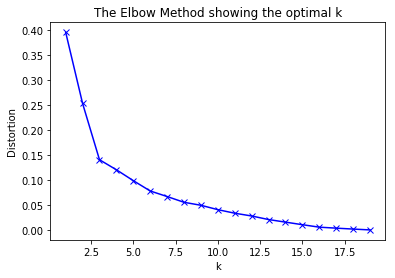

In [110]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(tfIdf_Matrix)
    kmeanModel.fit(reduced_data)
    distortions.append(sum(np.min(cdist(reduced_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_data.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


K = 3

In [111]:
def kmeans_cultures(numOfClusters):
    
    kmeans = KMeans(init='k-means++', n_clusters=numOfClusters, n_init=10)
    kmeans.fit(tfIdf_Matrix)
    return kmeans.predict(tfIdf_Matrix)


In [112]:
clustering_cuisine = pd.DataFrame(kmeans_cultures(3))
clustering_cuisine = pd.concat([clustering_cuisine, pd.DataFrame(df['cuisine'].unique())], axis = 1)

In [113]:
clustering_cuisine.columns = ['cluster', 'cuisine']

In [114]:
clustering_cuisine.sort_values(by = ['cluster'])

,cluster,cuisine
0,0,greek
3,0,indian
4,0,jamaican
5,0,spanish
6,0,italian
7,0,mexican
18,0,moroccan
12,0,cajun_creole
13,0,brazilian
17,1,korean


## get loading of each principle component

### top 10 important ingredients on PC1

In [115]:
pc_components = pd.DataFrame(pca.components_,
                             columns=features,
                             index=['PC1', 'PC2'])
pc_components.iloc[0, :].sort_values()[0:10]

salt                     -0.298124
olive oil                -0.215334
butter                   -0.204422
all-purpose flour        -0.201938
unsalted butter          -0.147312
milk                     -0.111908
extra-virgin olive oil   -0.100638
large eggs               -0.099519
onions                   -0.096636
ground black pepper      -0.086444
Name: PC1, dtype: float64

In [116]:
pc_components.iloc[0,:].sort_values(ascending = False)[:10]

soy sauce       0.327595
fish sauce      0.292008
sesame oil      0.248437
rice vinegar    0.175511
green onions    0.133162
mirin           0.123417
scallions       0.121606
garlic          0.119298
beansprouts     0.112711
ginger          0.109049
Name: PC1, dtype: float64

### top 10 important ingredients on PC2

In [117]:
pc_components.iloc[1,:].sort_values()[0:10]

olive oil                -0.335516
ground cumin             -0.199580
garlic cloves            -0.182809
extra-virgin olive oil   -0.137088
tomatoes                 -0.135253
garlic                   -0.126013
dried oregano            -0.117063
chopped cilantro fresh   -0.109101
purple onion             -0.088555
feta cheese crumbles     -0.083527
Name: PC2, dtype: float64

In [118]:
pc_components.iloc[1,:].sort_values(ascending = False)[:10]

all-purpose flour    0.283104
butter               0.242577
sugar                0.235359
unsalted butter      0.173894
milk                 0.164530
eggs                 0.159917
baking powder        0.144340
soy sauce            0.127538
large eggs           0.127247
baking soda          0.121116
Name: PC2, dtype: float64